In [2]:
import pandas as pd

In [26]:
df= pd.read_csv("Amazon Sale Report.csv")

df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6356\597583743.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [28]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [30]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [32]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [51]:
from openpyxl import Workbook
#creation d'un fichier Excel
wb=Workbook()
ws=wb.active
ws.title="Résumé des ventes"

#ajouter l'entete
ws.append(["categorie","Total des tailles", "Total des commandes"])
#calcul des canal de ventes et commandes par categorie
grouped_data=df.groupby("Category")[["Size", "Order ID"]].sum()

#ajouter les donnees dans excel
for category, row in grouped_data.iterrows():
    ws.append([category, row["Size"], row["Order ID"]])

#sauvegarder le fichier
wb.save("rapport_ventes_amazon.xlsx")
print("Rapport Excel genere avec succès!!!!")

Rapport Excel genere avec succès!!!!


In [54]:
!pip install reportlab


In [55]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt

In [58]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\Hp\AppData\Local\Temp\ipykernel_6356\936118274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [73]:
# Calcul des ventes par mois
df["Month"] = df["Date"].dt.to_period("M")
monthly_order = df.groupby("Month")["Order ID"].sum()

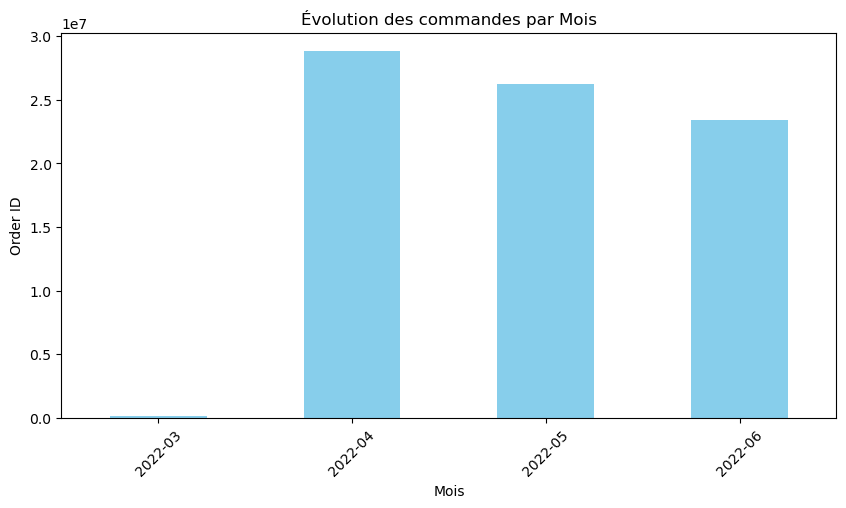

In [81]:
# Générer un graphique des commandes mensuelles
plt.figure(figsize=(10, 5))
monthly_order.plot(kind="bar", color="skyblue")
plt.title("Évolution des commandes par Mois")
plt.xlabel("Mois")
plt.ylabel("Order ID")
plt.xticks(rotation=45)
plt.savefig("amazon_commande_graphique.png")  #

In [83]:
# Création du PDF
pdf_file = "rapport_commandes_amazon.pdf"
c = canvas.Canvas(pdf_file, pagesize=letter)



In [97]:
# Vérifier et convertir 'Order ID' et 'Size' en nombre
df["Order ID"] = pd.to_numeric(df["Order ID"], errors="coerce")  
df["Size"] = pd.to_numeric(df["Size"], errors="coerce")

# Création du PDF
pdf_file = "rapport_commandes_amazon.pdf"
c = canvas.Canvas(pdf_file, pagesize=letter)

# Ajouter du texte au PDF
c.drawString(100, 750, "📊 Rapport des Commandes Amazon")
c.drawString(100, 730, f"Total des commandes : {int(df['Order ID'].sum()):,} unités")
c.drawString(100, 710, f"Total des tailles vendues : {int(df['Size'].sum()):,} articles")

# Ajouter le graphique
#c.drawImage("amazon_commande_graphique.png", 100, 500, width=400, height=200)

# Sauvegarder le PDF
c.save()
print("📄 Rapport PDF généré avec succès !")


📄 Rapport PDF généré avec succès !


In [103]:
import smtplib
import os
from email.message import EmailMessage

# Configuration des informations d'envoi
EMAIL_SENDER = "leonnebessala@gmail.com"
EMAIL_PASSWORD = "NTFS@love0928"
EMAIL_RECEIVER = "irisbessala11@gmail.com"

# Création du message
msg = EmailMessage()
msg["Subject"] = "📊 Rapport Automatisé des Commandes Amazon"
msg["From"] = EMAIL_SENDER
msg["To"] = EMAIL_RECEIVER
msg.set_content("Bonjour,\n\nVeuillez trouver ci-joint le rapport des ventes Amazon.\n\nCordialement.")

# Ajouter le fichier PDF en pièce jointe
with open("rapport_commandes_amazon.pdf", "rb") as f:
    msg.add_attachment(f.read(), maintype="application", subtype="pdf", filename="rapport_ventes_amazon.pdf")

# Envoyer l'e-mail
with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
    smtp.login(EMAIL_SENDER, EMAIL_PASSWORD)
    smtp.send_message(msg)

print("📧 E-mail envoyé avec succès !")


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials 5b1f17b1804b1-439b030b347sm111743885e9.26 - gsmtp')